# Trabalho Final - Classificação de Emoções por Texto

Alunos:

Gabriel Lima - 180113356

Israel Borges - 180033336

## Objetivo

  O objetivo do nosso trabalho final era de fazer uma aplicação de redes neurais que fosse capaz de detectar as emoções presentes em um fragmento de texto.
  
  As aplicações de uma rede desse tipo são várias, podemos citar aqui algumas como: uso psicológico, uso escolar, uso comercial para identificar os gostos dos consumidores.



## 1. Obtenção dos dados e pré-processamento

Nesta seção do notebook, estão as bibliotecas usadas para a realização do código.

Iniciamos nosso trabalho com o data set, que pode ser obtido através do link na variável "url". Nosso data set consistiu de um arquivo no formato CSV, que são trechos de texto separados por ponto e vírgula. De um lado havia nossas frases em língua inglesa e separadas pelo ponto e vírgula estavam as emoções associadas ao trecho de texto.

Nós importamos o 'Tokenizer' para converter o texto em uma sequência de tokens. O 'pad_sequences' é utilizado para preencher as sequências para um comprimento fixo. Isso se faz necessário porque as redes neurais esperam entradas de um mesmo tamanho. O 'LabelEncoder' é utilizado para converter dados categóricos em dados numéricos. O 'Sequential' é utilizado para criar uma pilha linear de camadas. Em seguida, o 'Embedding' é utilizado para converter palavras em vetores para representar o significado das palavras. O 'Flatten' é utilizado para transformar um tensor multidimensional em um tensor unidimensional. Por fim, o 'Dense' é utilizado para aplicar uma transformação não linear a um tensor de entrada. Depois disso os dados são lidos.


O objeto tokenizador é então alinhado com a lista de texto. Seu objetivo é aprender tokens únicos nos dados de texto. Ao tokenizar dados de texto, os tokens podem transformar os dados de texto em um que seja compreensível por máquinas.

Nos passos finais desta primeira seção, nós deixamos os dados com o mesmo comprimento para entregá-los a rede neural, depois transformamos os labels em valores numéricos e fazemos uma representação one-hot com eles.

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

from keras.layers import LSTM, Dropout
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/emotion_train.txt"  #Base de dados com os textos e labels de emoções
data = pd.read_csv(url, sep=';')
data.columns = ["Texto", "Emoções"]
print(data.head())

texts = data["Texto"].tolist()
labels = data["Emoções"].tolist()

# Tokenização dos dados
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Transformando os labels em inteiros
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Codificação ONe-thot dos labels
one_hot_labels = keras.utils.to_categorical(labels)

# Separação treinamento/teste
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences,
                                                one_hot_labels,
                                                test_size=0.2)



                                               Texto  Emoções
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness
Epoch 1/10
400/400 [==============================] - 110s 243ms/step - loss: 1.2511 - accuracy: 0.5103 - val_loss: 0.6619 - val_accuracy: 0.7641
Epoch 2/10
400/400 [==============================] - 89s 222ms/step - loss: 0.4097 - accuracy: 0.8620 - val_loss: 0.2919 - val_accuracy: 0.8994
Epoch 3/10
400/400 [==============================] - 91s 227ms/step - loss: 0.1858 - accuracy: 0.9396 - val_loss: 0.2368 - val_accuracy: 0.9181
Epoch 4/10
400/400 [==============================] - 87s 218ms/step - loss: 0.1132 - accuracy: 0.9628 - val_loss: 0.2499 - val_accuracy: 0.9222
Epoch 5/10
400/400 [===========================

## 2. Treinamento do modelo

Com o pré processamento realizado, nesta parte nos criamos os modelos de aprendizado. Separamos os dados em modelos grupos de treinamento e teste.

O modelo começa com uma camada de Embedding, que converte as palavras do vocabulário em vetores de números reais. Essa camada traduz as palavras em representações numéricas, capturando relações semânticas e contextuais entre elas.

Para lidar com a natureza sequencial do texto, incorporamos uma camada LSTM (Long Short-Term Memory). Essas camadas recorrentes são capazes de capturar dependências de longo prazo nas sequências, permitindo ao modelo entender o contexto das palavras ao longo do texto.

Além disso, introduzimos camadas de dropout para regularizar o modelo e previnir overfitting. O dropout desativa aleatoriamente neurônios durante o treinamento, incetivando o modelo a aprender de representações mais gerais e robustas.

A arquitetura inclui também camadas densas (fully connected) com ativações ReLU, que realizam transformações não lineares nos dados, e uma camada de saída com ativação softmax para a classificação multiclasses das emoções. A combinação dessas camadas permite que o modelo compreenda e aprenda padrões complexos nos textos, capturando nuances emocionais e fornecendo previsões precisas das emoções associadas aos diferentes contextos textuais. Usando também a função Softmax, que é usual para modelos de multicategoria.

Nosso treinamento foi realizado em 10 épocas com batches de tamanho 32. Ao todo, nosso modelo possuía 6 classes (anger, fear, joy, love, saddness e surprise).

In [ ]:


# Definição do modelo com camadas LSTM e Dropout
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128, input_length=max_length))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))



## 3. Avaliação dos resultados

Nessa parte do código, buscamos coletar alguns parâmetros avaliativos.

Essas métricas coletadas ajudama a observar se o modelo está indo para um caminho satisfatório ou não. O nosso modelo já estava nos dando uma acurácia acima de 90% tanto para treinamento quanto para validação, que consideramos como bons valores.

Também tiramos os valores de precisão, recall, f1-score. Com todos apresentando valores próximos de 1. Mostrando que as métricas de nosso modelo estavam boas.

Mostramos também uma matriz de confusão com os labels.

In [ ]:


# Avaliação das métricas do modelo
predictions = model.predict(xtest)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(ytest, axis=1)

print(classification_report(true_labels, predicted_labels))


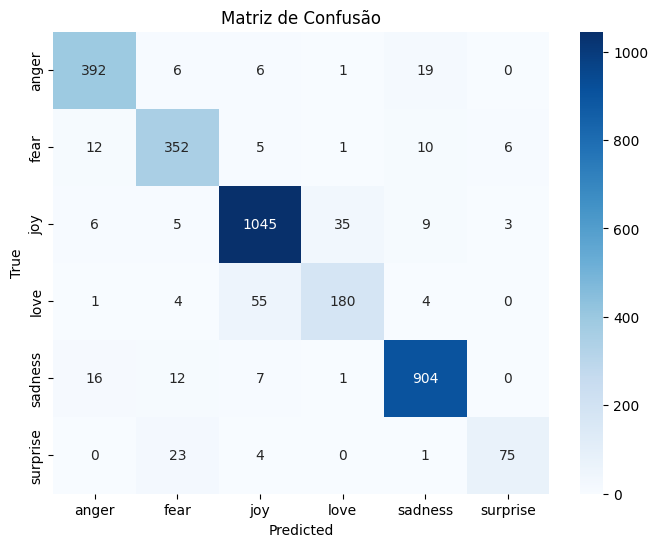

In [ ]:
# Definindo os rótulos das classes
class_labels = label_encoder.classes_

# Criação da matriz de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot da matriz de confusão com rótulos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

## 4. Validação com textos próprios

Nessa parte do trabalho, podemos ver a concretização do modelo. Ao serem inseridas frases em inglês no prompt, ele irá retornar a emoção que ele julgou ser a certa de ser classificada. Para realizar essa parte do trabalho, usei alguns exemplos do artigo: Aman, Saima & Szpakowicz, Stan. (2007). Identifying Expressions of Emotion in Text. 196-205. 10.1007/978-3-540-74628-7_27.


Os exemplos do artigo foram usados e coletados para serem exibidos em sala de aula durante a apresentação.

In [ ]:
#Inserção de frase (em inglês) pelo usuário
input_text = input("Insira a frase em inglês : ")

# Pré processamento do texto inserido
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label)

Insira a frase em inglês : Which, to be honest, was making Brad slightly nervous
1/1 [==============================] - 0s 58ms/step
['fear']


## Conclusão

A análise e classificação de emoções em textos são desafios fascinantes no campo da inteligência artificial. Buscamos durante esse trabalho final apresentar um modelo de redes neurais que fosse capaz de fazer isso, mesmo que de forma mais simples para frases.

Buscar os modelos e ferramentas mais adequados para cada tipo de aplicação nos ajudou a ir consolidando os conhecimentos adquiridos ao decorres da disciplina e dos trabalhos práticos. Culminando neste tema que já era uma área de interesse mesmo antes da realização deste disciplina.

Por fim, deixamos aqui algumas observações de possível melhoria do modelo. Entre elas estariam uma maior base de dados, ser capaz de serem utilizadas outras línguas no modelo de forma a ter uma atuação mais ampla. Também, seria interessante observar como se comportaria o modelo com textos mais longos de uma ou duas páginas, simulando assim um cenário mais realista de uso para o mesmo.